In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("../src/data/csvs/rsna_metadata.csv")
data = data.loc[data.label != 2]
data

,patientId,label,PatientAge,PatientSex
2,935f4fd2-337a-4a58-9004-2c56af697428,0,75,M
3,9e743877-0a64-443e-a305-3771a2e7ee89,0,57,M
7,e77dfc75-8bdd-4aee-967c-c7d97f9771f8,0,36,F
8,195033e1-ab56-4857-8b68-ef116fa576aa,1,55,F
9,8a5cff4d-53d2-4a42-94da-e4b3f2008b1d,1,38,F
...,...,...,...,...
26677,a304611a-7d97-428b-a09e-26c9d11d4f51,0,23,M
26678,8ec613cb-5c01-43b1-92e3-929cb536e77f,0,40,M
26679,bd8f8b0b-a89b-42f5-b92c-c0a152c6c1f2,1,47,M
26682,4e1aa7f5-2f63-4783-ac89-27cf07280c71,0,25,M


In [74]:
data = data.loc[data.PatientAge < 110]
# if below 31, young, if above 61 old, else middle
data["age_group"] = np.where(data.PatientAge < 31, "young", np.where(data.PatientAge >= 61, "old", "middle"))
data

/tmp/ipykernel_92305/3594477266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age_group"] = np.where(data.PatientAge < 31, "young", np.where(data.PatientAge >= 61, "old", "middle"))


,patientId,label,PatientAge,PatientSex,age_group
2,935f4fd2-337a-4a58-9004-2c56af697428,0,75,M,old
3,9e743877-0a64-443e-a305-3771a2e7ee89,0,57,M,middle
7,e77dfc75-8bdd-4aee-967c-c7d97f9771f8,0,36,F,middle
8,195033e1-ab56-4857-8b68-ef116fa576aa,1,55,F,middle
9,8a5cff4d-53d2-4a42-94da-e4b3f2008b1d,1,38,F,middle
...,...,...,...,...,...
26677,a304611a-7d97-428b-a09e-26c9d11d4f51,0,23,M,young
26678,8ec613cb-5c01-43b1-92e3-929cb536e77f,0,40,M,middle
26679,bd8f8b0b-a89b-42f5-b92c-c0a152c6c1f2,1,47,M,middle
26682,4e1aa7f5-2f63-4783-ac89-27cf07280c71,0,25,M,young


In [75]:
data_agg = data.groupby(["age_group", "label"]).agg({"patientId": "count"}).reset_index()
data_agg.head(20)

,age_group,label,patientId
0,middle,0,5370
1,middle,1,3427
2,old,0,1585
3,old,1,1255
4,young,0,1893
5,young,1,1330


In [76]:
data_agg = data.groupby(["PatientSex", "label"]).agg({"patientId": "count"}).reset_index()
data_agg.head(20)

,PatientSex,label,patientId
0,F,0,3904
1,F,1,2502
2,M,0,4944
3,M,1,3510


In [77]:
data_agg_to_plot = pd.DataFrame([
    {
        "group": "young",
        "lungOpacity": True,
        "count": 1330
    },
    {
        "group": "young",
        "lungOpacity": False,
        "count": 1893
    },
    {
        "group": "old",
        "lungOpacity": True,
        "count": 1255
    },
    {
        "group": "old",
        "lungOpacity": False,
        "count": 1585
    },
    {
        "group": "male",
        "lungOpacity": True,
        "count": 3510
    },
    {
        "group": "male",
        "lungOpacity": False,
        "count": 4944
    },
    {
        "group": "female",
        "lungOpacity": True,
        "count": 2502
    },
    {
        "group": "female",
        "lungOpacity": False,
        "count": 3904
    }
])

In [78]:
from matplotlib.font_manager import fontManager, FontProperties
path = "/home/getznerj/Downloads/Palatino Font Free/Palatino.ttf"
fontManager.addfont(path)
prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

In [79]:
TUM_colors =  {
    "TUMBlue": "#0065BD",
    "TUMSecondaryBlue": "#005293",
    "TUMSecondaryBlue2": "#003359",
    "TUMBlack": "#000000",
    "TUMWhite": "#FFFFFF",
    "TUMDarkGray": "#333333",
    "TUMGray": "#808080",
    "TUMLightGray": "#CCCCC6",
    "TUMAccentGray": "#DAD7CB",
    "TUMAccentOrange": "#E37222",
    "TUMAccentGreen": "#A2AD00",
    "TUMAccentLightBlue": "#98C6EA",
    "TUMAccentBlue": "#64A0C8"
}

/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/getznerj/miniconda3/envs/thesis_opacus/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

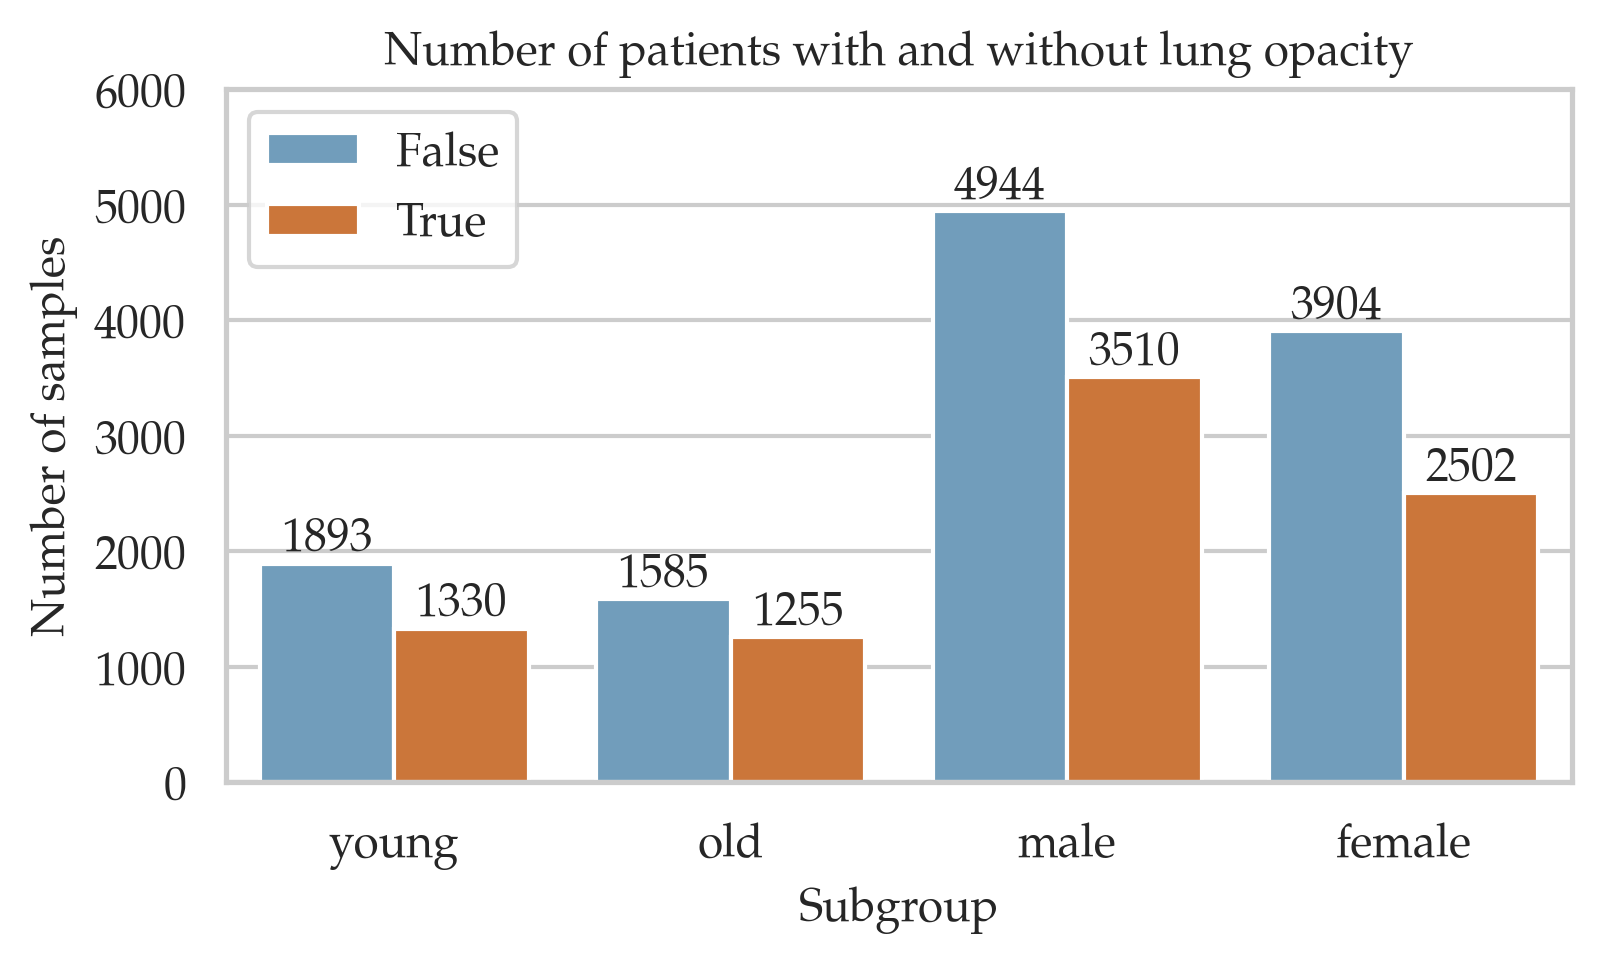

In [83]:
font_size = 11
width= 5.78853
plt.figure(figsize=(width, 3))
sns.set(rc={})
sns.set(font='Palatino', rc={"figure.dpi":300, 'savefig.dpi':300, 'axes.labelsize': font_size, 'axes.titlesize': font_size, 'font.size': font_size, 'legend.fontsize': font_size}, style="whitegrid")
g = sns.barplot(data=data_agg_to_plot, x="group", y="count", hue="lungOpacity", palette=[TUM_colors["TUMAccentBlue"], TUM_colors["TUMAccentOrange"]])
# label
g.set_title("Number of patients with and without lung opacity")
g.set_xlabel("Subgroup")
g.set_ylabel("Number of samples")
# ylim
# legend left
g.legend(loc='upper left')
g.set_ylim(0, 6000)
plt.setp(g.get_legend().get_title(), fontsize=font_size) 
# add counts above bars
for container in g.containers:
    g.bar_label(container, fmt='%.0f', fontsize=font_size)
# save figure 
plt.savefig("/home/getznerj/Documents/Thesis/charts and plots/dataset_distribution.png", bbox_inches='tight', dpi=300)